# Bokeh: An interactive approach of graphing data
[Bokeh](http://bokeh.pydata.org/en/latest/) is a Python interactive visualization library that targets modern web browsers for presentation.

We illustrate the approach of graphing with Bokeh through 2 examples:
* **Japan's aging population**: We've covered this data in class with Matplotlib. We hope it can become a bridge between the two packages and make a smooth transition. Basic interactions will be introduced in this example.
* **IMBD movies**: This is an advanced example from Bokeh Gallery, which requires a comprehensive understanding of the package. It is challenging, but the result is amazing. 

**
This IPython notebook was created by Zhiqi Guo, Yiran Zheng, Jiamin Zhang as final project for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).  **


## Preliminaries

First of all, let's follow our tradition in class and import packages. The following code is from IPython notebook: **Data Bootcamp: Examples ** created by Professor Dave Backus, Chase Coleman, and Spencer Lyon for the NYU Stern course [Data Bootcamp](http://databootcamp.nyuecon.com/).   

### Setting ###
**To ensure your Bokeh package is up to date, in the command line, execute "conda install Bokeh"**

In [1]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import matplotlib as mpl              # graphics parameters
import numpy as np                    # numerical calculations 

# IPython command, puts plots in notebook 
%matplotlib inline

# check Python version 
import datetime as dt 
import sys
print('Today is', dt.date.today())
print('What version of Python are we running? \n', sys.version, sep='') 

Today is 2016-05-13
What version of Python are we running? 
3.5.1 |Anaconda 2.4.1 (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]


C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


## Example 1:  Japan's aging population 

Data from the [UN's Population Division](http://esa.un.org/unpd/wpp/Download/Standard/Population/).  Remember one of Professor's favorite quotes?

> Last year, for the first time, sales of adult diapers in Japan exceeded those for babies. 

Now let's take a look at the data again.

In [2]:
url1 = 'http://esa.un.org/unpd/wpp/DVD/Files/'
url2 = '1_Indicators%20(Standard)/EXCEL_FILES/1_Population/'
url3 = 'WPP2015_POP_F07_1_POPULATION_BY_AGE_BOTH_SEXES.XLS'
url = url1 + url2 + url3 

cols = [2, 4, 5] + list(range(6,28))
#est = pd.read_excel(url, sheetname=0, skiprows=16, parse_cols=cols, na_values=['…'])
prj = pd.read_excel(url, sheetname=1, skiprows=16, parse_cols=cols, na_values=['…'])

"""
for later:  change cols for the two sources, rename 80+ to 80-84, then concat 
#pop = pd.concat([est, prj], axis=0, join='outer')      
"""
pop = prj 
pop.dtypes

Major area, region, country or area *     object
Country code                               int64
Reference date (as of 1 July)              int64
0-4                                      float64
5-9                                      float64
10-14                                    float64
15-19                                    float64
20-24                                    float64
25-29                                    float64
30-34                                    float64
35-39                                    float64
40-44                                    float64
45-49                                    float64
50-54                                    float64
55-59                                    float64
60-64                                    float64
65-69                                    float64
70-74                                    float64
75-79                                    float64
80-84                                    float64
85-89               

In [3]:
# rename some variables 
pop = pop.rename(columns={'Reference date (as of 1 July)': 'Year', 
                          'Major area, region, country or area *': 'Country', 
                          'Country code': 'Code'})
# select Japan and years 
countries = ['Japan']
years     = [2015, 2025, 2035, 2045, 2055, 2065]
pop = pop[pop['Country'].isin(countries) & pop['Year'].isin(years)]
pop = pop.drop(['Country', 'Code'], axis=1)
pop = pop.set_index('Year').T
pop

Year,2015,2025,2035,2045,2055,2065
0-4,5269.038,4872.732,4610.562,4448.702,4271.907,4098.930
5-9,5398.973,5086.975,4720.645,4529.657,4371.016,4183.472
10-14,5603.638,5275.897,4880.967,4619.658,4458.145,4280.722
15-19,5960.784,5425.060,5114.258,4748.906,4557.117,4395.831
20-24,6111.768,5665.781,5340.457,4947.499,4685.414,4517.465
25-29,6843.421,6033.351,5502.279,5194.574,4829.637,4630.632
30-34,7455.687,6166.461,5726.044,5404.633,5013.420,4745.904
35-39,8345.753,6868.725,6067.218,5541.785,5236.482,4869.093
40-44,9689.865,7446.336,6172.067,5739.054,5422.259,5031.587
45-49,8623.094,8289.040,6837.234,6050.330,5533.987,5232.930


## Graphing with Matplotlib

* Returns a static image
* No web display
* Hard to rescale
* No interaction

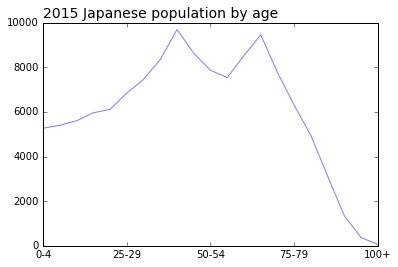

In [4]:
fig, ax = plt.subplots()
pop[2015].plot(ax=ax,kind='line',alpha=0.5, sharey=True, figsize=(6,4))
ax.set_title('2015 Japanese population by age', fontsize=14, loc='left')

## Graphing with Bokeh
* ** Approach #1**: Leverge our command of Matplotlib to create a Bokeh graph in a HTML file.


In [5]:
from bokeh import mpl
from bokeh.plotting import output_file, show,figure


fig, ax = plt.subplots()
ax = pop[2015].plot(kind='line')#,alpha=0.5)#, sharey=True, figsize=(6,4))

ax.set_title('2015 Japanese population by age', fontsize=14, loc='left')

output_file('JPN.html') #Get a plot in HTML file

show(mpl.to_bokeh(fig))


**Question**. What's the difference between the plots generated by two pacakages?

**Question**.What is the function of each button on the control panel at top of the Bokeh plot?

**Comment**. From the plot we can see that leveraging other library may not be the best way to graphing in Bokeh, due to the compatibility problem. The reason why we don't use bar chart here is that bar in matplotlib is fully incompatble with Bokeh.

* **Approach #2**: Generate a plot in a separate html file with Bokeh from scratch.


Let's make a simple dataframe to test out the functions first.

In [6]:
from bokeh.charts import Bar, output_file, show

def simple_bar():
    #Here we first set up a easy data frame to use
    #Best support is with data in a format that is table-like
    data = {
        'sample': ['A','B'],
        'value': [40,30]  
    }

    df = pd.DataFrame(data)

    # set up the title, x-axis and y-axis
    bar = Bar(df, 
              'sample', 
              values='value', 
              bar_width=0.4, #we can manipulate width of bar manually 
              title="Our first test bar chart")
    
    output_file("Simpe_test_bar.html")
    print(df) #Here we print out df to see the plot of bar chart plot with a dataframe
    show(bar)
    
simple_bar()


  sample  value
0      A     40
1      B     30


* **Approach #3**: Create Bokeh charts integrated in IPython notebook.<Br>
Notice the difference in importing package and calling function

In [7]:
from bokeh.charts import Bar, output_file, show
from bokeh.plotting import *    #Here the line from bokeh.plotting import * implicitly pulls 
                                #the output_notebook function into the namespace.


#Here we first set up a easy data frame to use
#Best support is with data in a format that is table-like
data =  {
        'sample': ['A','B'],
        'value': [40,30]  
        }

df = pd.DataFrame(data)

# set up the title, x-axis and y-axis
bar = Bar(df, 
          'sample', 
          values='value', 
          bar_width=0.4,
          title="Our First Test Bar Chart"
         #,tools='crosshair'
         )

output_notebook()#Here,instead of calling output_file(),
                 #we call output_notebook() to directly display plot in notebook
show(bar)


Loading BokehJS ...

**Exercise**. Uncomment the "tools='crosshair'" attribute of the bar plot to see what happens. Find out more tools that we can use.

* **Apply the bar chart on Japan's example**



In [8]:
#The function barplot will give the population's bar plot for the year we choose
#We can choose the year in 2015,2025,2035,2045,2055,2065

from bokeh.charts import Bar, output_file, show
from bokeh.charts.attributes import CatAttr
def barplot(choose_year):
    
    population = pop[int(choose_year)].tolist()
    year = list(pop.index)
    data = {
        'year': year,
        'population':population 
    }
    df = pd.DataFrame(data)

    bar = Bar(df, 
              label=CatAttr(columns=["year"], sort=False), #Caution:we have to manually turn off the bar sorting
                                                           #or the bar plot desn't follow 
              values='population', 
              ylabel="Population(thousands)",
              title="Japan's populaiton in " + str(choose_year)+" by age", color="red")
    output_file("Japan's populaiton in " + str(choose_year))
    
    
    show(bar) 
    return bar

#Try several years and see how it works
barplot(2015)    
#barplot(2025)
#barplot(2035)

## Adding interactions
* **Tab panes**: Tab panes allow multiple plots or layouts to be show in selectable tabs.

In [9]:
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure

output_file("tab_panes.html", mode='cdn')

p1 = figure(plot_width=300, plot_height=300)
p1 = barplot(2015)
tab1 = Panel(child=p1, title="Japan's Populaiton for 2015") #tab1 for year 2015

p2 = figure(plot_width=300, plot_height=300)
p2 = barplot(2025)
tab2 = Panel(child=p2, title="Japan's Populaiton for 2025") #tab2 for year 2025

p2 = figure(plot_width=300, plot_height=300)
p2 = barplot(2035)
tab3 = Panel(child=p2, title="Japan's Populaiton for 2035") #tab3 for year 2035


tabs = Tabs(tabs=[ tab1, tab2, tab3 ])  # create different tabs

show(tabs)

ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc


ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67


ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25


ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25


## Example 2:  IMDB Movies
This is a challenging example which involves more widgets that we can play with. Some of the widgets requires a CustomJS callback. If you have a nice command of javascript, then go for it. If you don't, just skip it. These interactions can also be done by using Bokeh Server. We didn't cover it here, but if you are interested in it, you can get tutorials on Bokeh's website. 


### Import packages and load our data.
Remember to download the csv and put it in the same folder as this IPython notebook.

In [10]:
import numpy as np


from bokeh.plotting import Figure
from bokeh.models import ColumnDataSource, HoverTool, HBox, VBoxForm
from bokeh.models.widgets import Slider, Select, TextInput



movies = pd.read_csv("movies.csv")

In [11]:
movies

,Unnamed: 0,ID,imdbID,Title,Year,mpaaRating,Runtime,Genre,Released,Director,...,Fresh,Rotten,userMeter,userRating,userReviews,BoxOffice,Production,color,alpha,revenue
0,0,4972,tt0004972,The Birth of a Nation,1915,Not Rated,165.0,"Drama, History, Romance",1915-03-03,D.W. Griffith,...,38,0,58.0,3.3,4034.0,0.0,Gravitas,grey,0.25,0
1,1,6206,tt0006206,Les vampires,1915,Not Rated,399.0,"Action, Adventure, Crime",1915-11-13,Louis Feuillade,...,13,0,85.0,3.8,2075.0,0.0,0,grey,0.25,0
2,2,6864,tt0006864,Intolerance: Love's Struggle Throughout the Ages,1916,Not Rated,197.0,"Drama, History",1916-09-05,D.W. Griffith,...,27,1,78.0,3.8,4604.0,0.0,Cohen Media Group,grey,0.25,0
3,3,9470,tt0009470,Over the Top,1918,0,0.0,"Drama, War",1918-03-31,Wilfrid North,...,4,7,51.0,2.8,44707.0,0.0,NaN,grey,0.25,0
4,4,9968,tt0009968,Broken Blossoms or The Yellow Man and the Girl,1919,Not Rated,90.0,"Drama, Romance",1919-10-20,D.W. Griffith,...,19,1,72.0,3.7,3651.0,0.0,Kino on Video,grey,0.25,0
5,5,10323,tt0010323,The Cabinet of Dr. Caligari,1920,Unrated,67.0,Horror,1921-03-19,Robert Wiene,...,37,0,90.0,4.1,25103.0,0.0,0,grey,0.25,0
6,6,11130,tt0011130,Dr. Jekyll and Mr. Hyde,1920,Unrated,49.0,"Drama, Horror, Sci-Fi",1920-04-01,John S. Robertson,...,12,1,67.0,3.4,2878.0,0.0,0,grey,0.25,0
7,7,11841,tt0011841,Way Down East,1920,Not Rated,145.0,"Drama, Romance",1920-09-03,D.W. Griffith,...,15,1,69.0,3.6,984.0,0.0,Kino Lorber,grey,0.25,0
8,8,12349,tt0012349,The Kid,1921,Not Rated,68.0,"Comedy, Drama, Family",1921-02-06,Charles Chaplin,...,19,0,96.0,4.2,14440.0,0.0,First National Pictures Inc.,grey,0.25,0
9,9,12532,tt0012532,Orphans of the Storm,1921,Not Rated,150.0,Drama,0,D.W. Griffith,...,9,1,71.0,3.8,410.0,0.0,0,grey,0.25,0


### Plot with Basic Glyphs

In [12]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()   

p = figure(plot_width=400, plot_height=400)

# add a circle renderer with a size, color, and alpha
p.quad(movies["Meter"], movies["Reviews"], color="navy", alpha=0.5)

# show the results
show(p)

Loading BokehJS ...

ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25


**Excersice**. Try some other methods (glyphs) such as asterisk, dimond, circle_cross etc. 

**Comment**. See more methods of plotting on [Bokeh Reference Guide](http://bokeh.pydata.org/en/latest/docs/reference/plotting.html).

### Slider
The Bokeh [slider] is a Bokeh widget which(http://bokeh.pydata.org/en/0.10.0/docs/user_guide/interaction.html#slider) can be configured with start and end values, a step size, an initial value and a title.

Before we make a basic slider, we should import some packages first.

In [13]:
from bokeh.models.widgets import Slider
from bokeh.io import vform 

In [14]:
#Lets try make a slider of the reviews
reviews = Slider(title="Minimum number of reviews", 
                 value=80, #initial value when the slider is generated
                 start=10,
                 end=300,
                 step=10)

show(vform(reviews))

ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25


In [15]:
movies['Year'].describe()

count    12569.000000
mean      1996.328666
std         17.690950
min       1902.000000
25%       1991.000000
50%       2002.000000
75%       2008.000000
max       2014.000000
Name: Year, dtype: float64

In [16]:
#Try with year
reviews = Slider(title="Year of release", value=1950, start=1902, end=2014, step=1)

show(vform(reviews))

ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25


### CustomJS of Widgets

If we want to use the slider to change the data of a plot, we have to use the [CustomJS of Widgets](http://bokeh.pydata.org/en/0.10.0/docs/user_guide/interaction.html#customjs-for-widgets). 

We encounter JavaScript Callback here. Callbacks allow us to write javascript pieces and included in our python project, in order to trigger sophisticated interactions. Therefore people can play with the graphic a little bit more. 

In [17]:
#Import the CustomJS of Widgets package
from bokeh.models import CustomJS, Range1d

In [18]:
# create a column data source for the plots to share
x = movies["Meter"]
y = movies["Reviews"]
source = ColumnDataSource(data=dict(x=x, y=y))
all_data = ColumnDataSource(data=dict(x=x, y=y))

# create a new figure
p = figure(plot_width=400, plot_height=400)
p.circle(x, y, size=5, color="navy", alpha=0.5, source=source)
p.set(y_range=Range1d(0, 310), x_range=Range1d(-5, 105))

In [19]:
#callback

callback = CustomJS(args=dict(source=source, all_data=all_data), code="""
        var data = source.get('data');
        var all_data = all_data.get('data');
        var f = cb_obj.get('value');
        x = all_data['x'];
        y = all_data['y'];
        data['y'] = [];
        data['x'] = [];
        for (i=0; i < y.length; i++){
            if (y[i]>f) {
                data['y'].push(y[i]);
                data['x'].push(x[i]);
            }
             
        }     
         source.trigger('change');
    """)


In [20]:
reviews = Slider(
    title="Minimum number of reviews", 
    value=50, start=10, end=305, step=5,
    callback=callback)

In [21]:
layout = vform(reviews, p)

show(layout)

ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Figure, ViewModel:Plot, ref _id: 99a0b8a3-70c9-405e-b521-3df3f5d046f2


### Hover
The Bokeh [hover](http://bokeh.pydata.org/en/0.9.3/docs/user_guide/tools.html#hover-tool) is a passive inspector tool, which displays informational tooltips whenever the cursor is directly over a glyph. The data to show comes from the glyph’s data source, and what is to be displayed is configurable through a tooltips attribute that maps display names to columns in the data source, or to special known variables.

In [22]:
hover = HoverTool(tooltips = [
        ("$", "@revenue"),
        ("Title","@title"),
        ("Year", "@year")    #Start with “@” , interpreted as columns on the data source.
    ])

In [23]:
%reset p 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  p, please run `%reset?` for details


In [24]:
#add revenue to the column data source that will be used by the plot
source = ColumnDataSource(data=dict(x=x, y=y, revenue=movies["revenue"], title=movies["Title"], year=movies["Year"]))

p = figure(plot_width=400, plot_height=400,tools=[hover])
p.circle(x, y, size=5, color="navy", alpha=0.5, source=source)
p.set(y_range=Range1d(0, 310), x_range=Range1d(-5, 105))

In [25]:
show(p)

ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 6eda24e2-2530-42fb-944d-e9fa8b67dfcc
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: 3898b7fa-50ab-4815-9f1b-2dd48897dc67
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1001 (NO_DATA_RENDERERS): Plot has no data renderers: Figure, ViewModel:Plot, ref _id: e58aa9b4-f413-40a4-a96f-67940c9bee25
ERROR:C:\Users\Jamiezhang221\Anaconda3\lib\site-packages\bokeh\core\validation\check.py:W-1004 (BOTH_CHILD_AND_ROOT): Models should not be a document root if they are in a layout box: Figure, ViewModel:Plot, ref _id: 99a0b8a3-70c9-405e-b521-3df3f5d046f2


In [26]:
%reset p 

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  p, please run `%reset?` for details
